In [8]:
import mne
import PyQt5
import numpy as np
import os

In [9]:
edf_file = "data/chb01/chb01_01.edf"

raw = mne.io.read_raw_edf(edf_file, preload=True)

Extracting EDF parameters from c:\Code\Epilepsey\data\chb01\chb01_01.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\josep\AppData\Local\Temp\ipykernel_36176\4192692272.py:3: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(edf_file, preload=True)


<Info | 8 non-empty values
 bads: []
 ch_names: FP1-F7, F7-T7, T7-P7, P7-O1, FP1-F3, F3-C3, C3-P3, P3-O1, ...
 chs: 23 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 128.0 Hz
 meas_date: 2076-11-06 11:42:54 UTC
 nchan: 23
 projs: []
 sfreq: 256.0 Hz
 subject_info: 1 item (dict)
>
['FP1-F7', 'F7-T7', 'T7-P7', 'P7-O1', 'FP1-F3', 'F3-C3', 'C3-P3', 'P3-O1', 'FP2-F4', 'F4-C4', 'C4-P4', 'P4-O2', 'FP2-F8', 'F8-T8', 'T8-P8-0', 'P8-O2', 'FZ-CZ', 'CZ-PZ', 'P7-T7', 'T7-FT9', 'FT9-FT10', 'FT10-T8', 'T8-P8-1']
Using matplotlib as 2D backend.


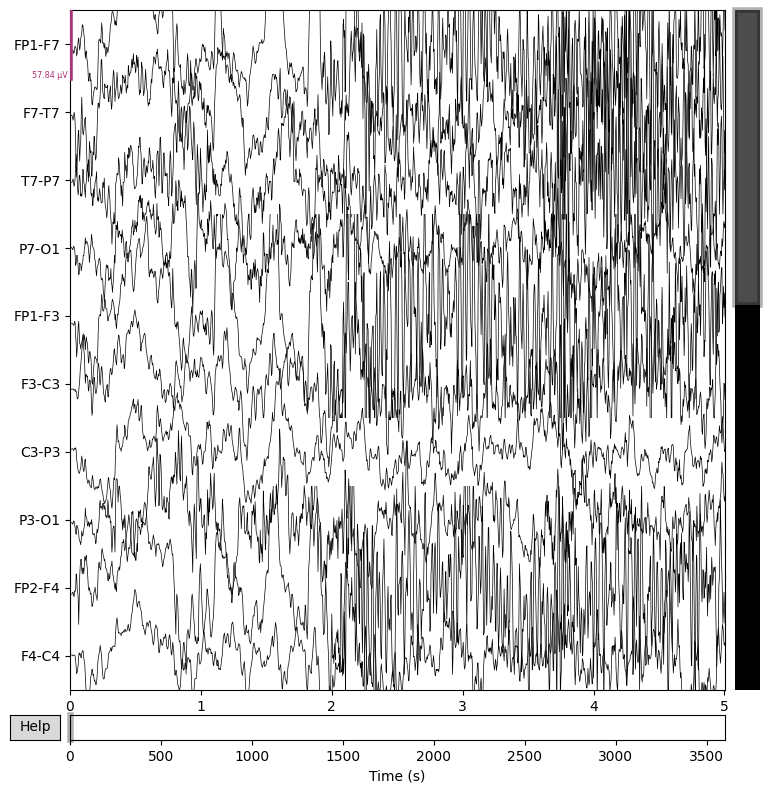

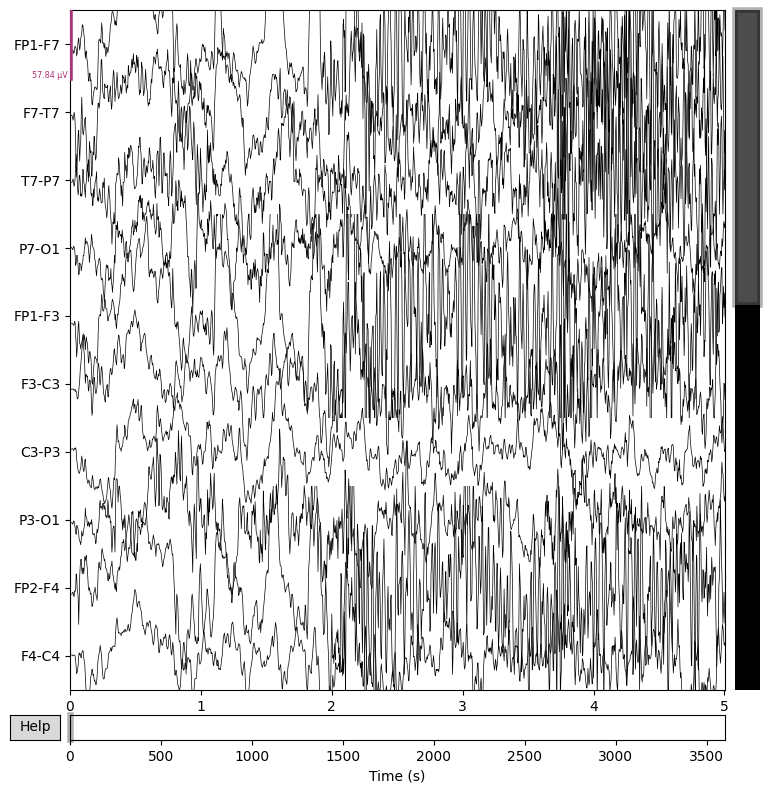

In [10]:
print(raw.info)

print(raw.ch_names)

raw.plot(duration=5, n_channels=10, scalings='auto')

NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 8.000 (s)
Plotting power spectral density (dB=True).


C:\Users\josep\AppData\Local\Temp\ipykernel_25912\677053143.py:1: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  raw.plot_psd(fmax=50)
c:\ProgramData\miniconda3\envs\epilepsey\lib\site-packages\mne\viz\utils.py:158: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)


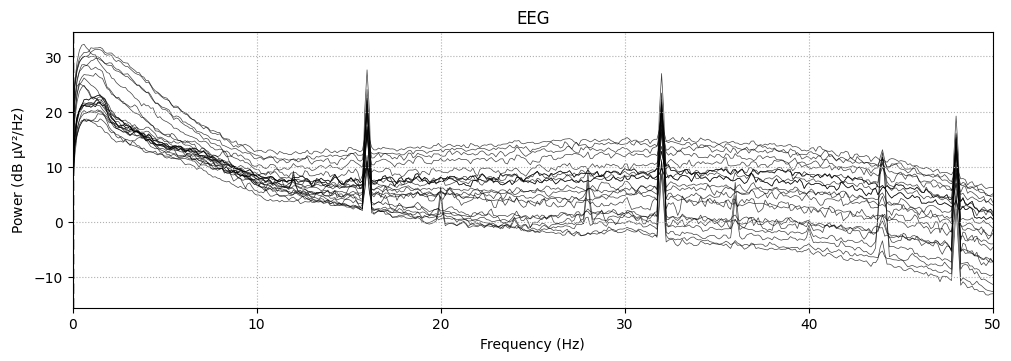

In [12]:
raw.plot_psd(fmax=50)

In [15]:
selected_channels = [
    'FP1-F7', 'F7-T7', 'T7-P7', 'P7-O1', 'FP1-F3', 'F3-C3',
    'C3-P3', 'P3-O1', 'FP2-F4', 'F4-C4', 'C4-P4', 'P4-O2',
    'FP2-F8', 'F8-T8', 'T8-P8-0', 'P8-O2', 'FZ-CZ', 'CZ-PZ'
]


In [ ]:
raw_selected = raw.copy().pick_channels(selected_channels)

print(raw_selected.info)
print(raw_selected.ch_names)

raw_selected.plot(duration=5, n_channels=18, scalings='auto')

SyntaxError: closing parenthesis ')' does not match opening parenthesis '[' (3537194430.py, line 1)